# Face Recognition with Eigenfaces

Resources:

1. MIT OpenCourseWare Lecture Notes titled "Face Recognition Using Eigenfaces: <br />
https://ocw.mit.edu/courses/6-881-representation-and-modeling-for-image-analysis-spring-2005/resources/l02/



## Objective
* To recognize familiar faces in our dataset

## Basic Idea
Apply Principal Component Analysis (PCA) on face images.

PCA works by keeping the most important information from a feature and then ignore the rest (noise). In terms of Face Recognition, PCA looks for directions where face images vary the most as these are the principal components of the faces.

Conceptually, applying dimensional reduction technique on images, allows images of the same object to have high similarity in values relative to images of another object that looks completely different.

When we receive images such as face images and reduce its dimension, we can then take another image that we want to recognize, project it onto the face space and check for the residuals. If the residual is too high, it indicates a very low similarity, indicating that the image might not be even a face image. If the projection is close to one of the face image classes, we can safely assign it to that class. and if it's not, that it's probably a new face that doesn't exist in the dataset.

## Step-by-step in theory
1. Stack face images as vectors
2. Center the data
    * Compute average face
    * Subtract from every face
3. Find directions of maximum variance (to capture features of the face) which is done mathematically by:
    * Compute covariance matrix
    * Find eigen vectors (related to eigenvalues)
4. Keep only the most related components (dimensional reduction part)
5. Eigenfaces reconstruction

## Code Implementation

### Download and Save Dataset

In [1]:
import kagglehub
from pathlib import Path

data_dir = Path('../dataset/sample_dataset/train')

if data_dir.exists():
    print(f"Dataset already exist at: {data_dir}")
else:
    # Download latest version of vggface2
    path = kagglehub.dataset_download("hearfool/vggface2")

    print("Path to dataset files:", path)
    
    import os
    import shutil

    target_dir = "../dataset"

    # Make directory, leave unaltered if already exist
    os.makedirs(target_dir, exist_ok=True)
    
    shutil.move(path, target_dir)

Dataset already exist at: ../dataset/sample_dataset/train


/Users/reiner/Documents/GitHub/face_recognition_eigenfaces/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Sample_dataset decription:
* Class 1: n000430
    * Face Type: Asian
    * Gender: Female
    * Train path: '../sample_dataset/train/n000430'
    * Test path: '../sample_dataset/test/n000430'
    * Real name: 'Amy Tan'
    
* Class 2: n000458
    * Face Type: Western
    * Gender: Female
    * Train path: '../sample_dataset/train/n000458'
    * Test path: '../sample_dataset/test/n000458'

* Class 3: n000459
    * Face Type: Indian
    * Gender: Male
    * Train path: '../sample_dataset/train/n000459'
    * Test path: '../sample_dataset/test/n000459'

* Class 4: n000466
    * Face Type: Western
    * Gender: Male
    * Train path: '../sample_dataset/train/n000466'
    * Test path: '../sample_dataset/test/n000466'

### Preprocess Images

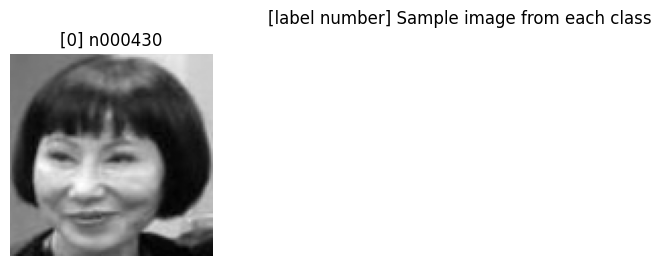

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import cv2
import os
from pathlib import Path

data_dir = Path('../dataset/sample_dataset/train_cleaned')

class_folder_list = []
image_path_list = []
image_list = []
label_list = []

NUM_OF_CLASSES = 4
TARGET_WIDTH = 100
TARGET_HEIGHT = 100

label_mapping = {
    'n000430': 0,
    'n000458': 1,
    'n000459': 2,
    'n000466': 3,
    # 'n000430_2': 4,
    }

plt.figure(figsize=(NUM_OF_CLASSES * 3, 3))

# Get all folder in the dataset
for class_folder in sorted(os.listdir(data_dir)):
    
    # Skip other file
    if class_folder == ".DS_Store":
        continue
    
    ### Code to Skip specific class
    #
    # if class_folder == "n000430":
    #     continue
    if class_folder == "n000458":
        continue
    if class_folder == "n000459":
        continue
    if class_folder == "n000466":
        continue
    
    if class_folder == "n000430_2":
        continue
    
    # Save folder name in class_folder_list
    class_folder_list.append(class_folder)

    for index, image_file in enumerate(sorted(os.listdir(data_dir / class_folder))):
        # print(image_file)
        
        image_path = data_dir / class_folder / image_file
        
        # Read as grayscale
        image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
        
        # Read ERROR HANDLING
        if image is None:
            print("FAILED TO READ:", image_path)
            continue
        
        # Save the list
        image_path_list.append(image_file)
        label_list.append(label_mapping[class_folder])
        
        # Image resize to 100x100
        image = cv2.resize(image, (TARGET_WIDTH, TARGET_HEIGHT))
        
        # Show the first train image from each label
        if index == 0:
            # print(f'PATH WITH INDEX 0 = {data_dir / class_folder / image_file}')
            
            # Show images as subplots
            plt.subplot(1, NUM_OF_CLASSES, len(class_folder_list))
            plt.imshow(image, cmap="gray")
            plt.title(f'[{label_mapping[class_folder]}] {class_folder}')
            plt.suptitle('[label number] Sample image from each class')
            plt.axis('off')
            
            # DEBUG PRINT
            # print(image.shape)
            # print(image.flatten().shape)
            # print(image.flatten())
            
        image_list.append(image.flatten())
        
plt.show()

image_list = np.array(image_list)

# DEBUG PRINT
# print(type(image_list))
# print(image_list.ndim)
# print(image_list.shape)
# print(image_list)
# print()
# print(image_list[:2])
        
# print(class_folder_list)
# print(image_path_list)
# print(label_list)
# print(len(image_path_list))
# print(len(label_list))

### Calculate Mean Faces

In [3]:
len(image_list)

231

In [4]:
image_list.shape

(231, 10000)

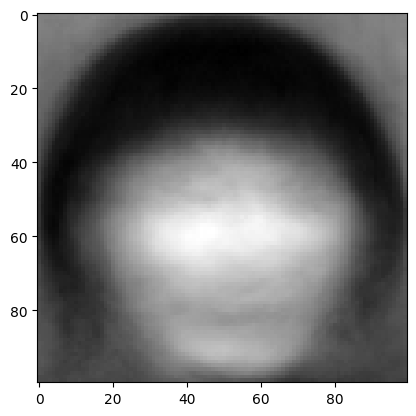

In [5]:
# mean_faces = []

# for pixel in np.arange(image_list.shape[1]):
#     mean_pixel = image_list[:, pixel].sum() / image_list.shape[0]
#     mean_faces.append(mean_pixel)
    
# mean_faces = np.array(mean_faces)

mean_faces = image_list.mean(axis=0)
    
mean_faces_reshaped = mean_faces.reshape(TARGET_HEIGHT,TARGET_WIDTH)
# print(mean_faces_reshaped)
plt.imshow(mean_faces_reshaped, cmap='gray')

# image_list.sum() / len(image_list)
# Compute the average of each pixel

The Mean Faces result looks bad because we cannot see the facial structure quite clearly. A good mean faces would have clarity on the face features like eyes area, nose, mouth, and ears. The cause of this issue is from the dataset, therefore we have to readjust the dataset as follows:
* Align face so that facial structures are at similar positions
* Rotate faces that are not straight
* Similar lighting


### Subtract the mean from each face

Face diff pixel  ranges from -121.78354978354977 - 137.46320346320346
After normalized ranges from 0.0 - 1.0


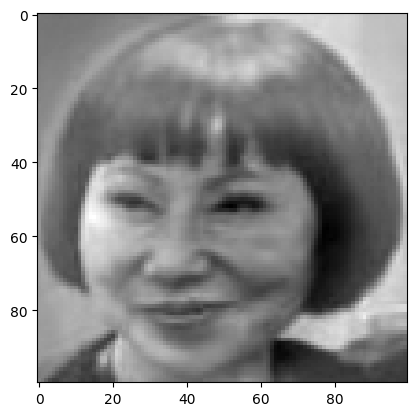

In [6]:
face_diff = image_list - mean_faces
face_diff_reshaped = face_diff[0].reshape(TARGET_HEIGHT,TARGET_WIDTH)

print(f'Face diff pixel  ranges from {face_diff_reshaped.min()} - {face_diff_reshaped.max()}')

# Normalize pixel difference for visualization
face_diff_normalized = (face_diff_reshaped - face_diff_reshaped.min()) / (face_diff_reshaped.max() - face_diff_reshaped.min())

print(f'After normalized ranges from {face_diff_normalized.min()} - {face_diff_normalized.max()}')

plt.imshow(face_diff_normalized, cmap='gray')

### Calculate Covariance Matrix


In [7]:
face_diff

array([[ -0.51948052,  -2.51082251,  -2.15151515, ..., -62.12987013,
        -62.12554113, -63.24675325],
       [111.48051948, 110.48917749, 112.84848485, ..., 115.87012987,
        115.87445887, 117.75324675],
       [-84.51948052, -85.51082251, -84.15151515, ..., -39.12987013,
        -39.12554113, -39.24675325],
       ...,
       [-76.51948052, -73.51082251, -74.15151515, ...,  29.87012987,
         39.87445887,  62.75324675],
       [-55.51948052, -55.51082251, -53.15151515, ...,  11.87012987,
         40.87445887,   0.75324675],
       [-65.51948052, -64.51082251, -57.15151515, ..., -64.12987013,
        -63.12554113, -63.24675325]], shape=(231, 10000))

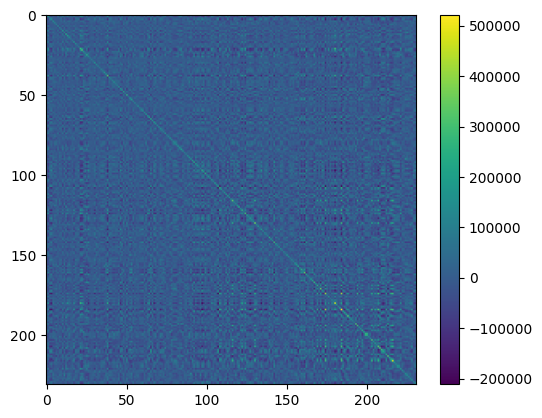

In [8]:
cov_matrix = (face_diff @ face_diff.T) / (face_diff.shape[0] - 1)

plt.imshow(cov_matrix)
plt.colorbar()

### Calculate eigenvalues and eigenvectors with Decomposition of Covariance

In [9]:
eigenvalues_eigh, eigenvectors_eigh = np.linalg.eigh(cov_matrix)

# sort descending
idx = np.argsort(eigenvalues_eigh)[::-1]
eigenvalues_eigh = eigenvalues_eigh[idx]
eigenvectors_eigh = eigenvectors_eigh[:, idx]

# compute eigenfaces
eigenfaces_eigh = face_diff.T @ eigenvectors_eigh

# normalize
eigenfaces_eigh = eigenfaces_eigh / np.linalg.norm(eigenfaces_eigh, axis=0)

### Visualize the eigenface

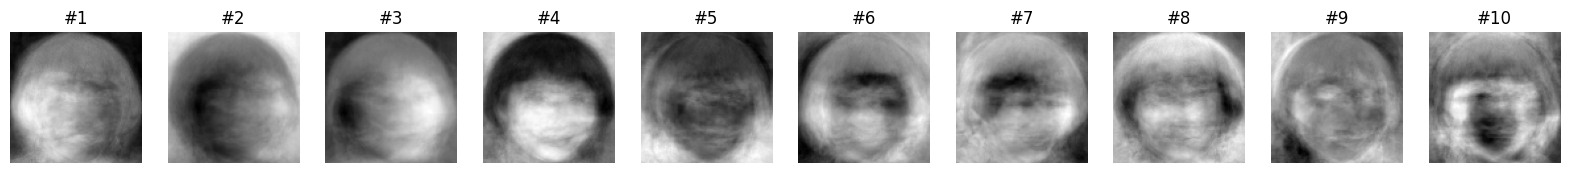

In [10]:
n = 10

plt.figure(figsize=(2*n, 3))

for index in range(n):
    eigenfaces_sample_reshaped = eigenfaces_eigh[:,index].reshape(TARGET_HEIGHT,TARGET_WIDTH)

    # print(f'eigenfaces sample pixel ranges from {eigenfaces_sample_reshaped.min()} - {eigenfaces_sample_reshaped.max()}')

    # Normalize pixel difference for visualization
    eigenfaces_sample_normalized = (eigenfaces_sample_reshaped - eigenfaces_sample_reshaped.min()) / (eigenfaces_sample_reshaped.max() - eigenfaces_sample_reshaped.min())

    # print(f'eigenfaces sample pixel ranges from {eigenfaces_sample_normalized.min()} - {eigenfaces_sample_normalized.max()}')

    plt.subplot(1, n, index+1)
    plt.imshow(eigenfaces_sample_normalized, cmap='gray')
    plt.title(f'#{index+1}')
    plt.axis('off')

### Eigenvalues and Eigenfaces Calculation with SVD

In [11]:
U, S, Vt = np.linalg.svd(face_diff, full_matrices=False)
eigenfaces_svd = Vt.T
eigenvalues_svd = S**2 / (face_diff.shape[0] - 1)

### Visualization for SVD Result

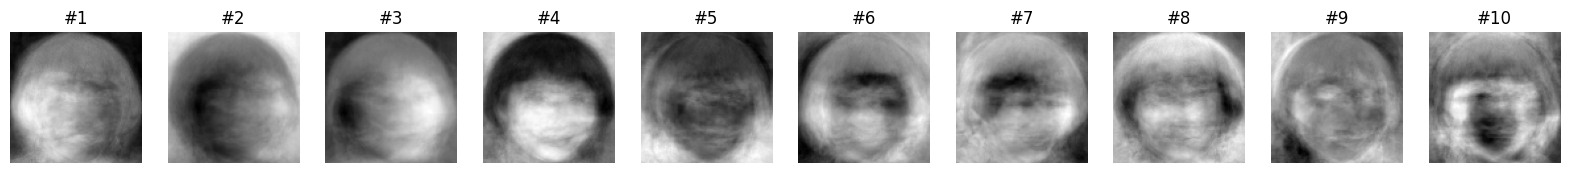

In [12]:
n = 10

plt.figure(figsize=(2*n, 3))

for index in range(n):
    eigenfaces_sample_reshaped = eigenfaces_svd[:,index].reshape(TARGET_HEIGHT,TARGET_WIDTH)

    # print(f'eigenfaces sample pixel ranges from {eigenfaces_sample_reshaped.min()} - {eigenfaces_sample_reshaped.max()}')

    # Normalize pixel difference for visualization
    eigenfaces_sample_normalized = (eigenfaces_sample_reshaped - eigenfaces_sample_reshaped.min()) / (eigenfaces_sample_reshaped.max() - eigenfaces_sample_reshaped.min())

    # print(f'eigenfaces sample pixel ranges from {eigenfaces_sample_normalized.min()} - {eigenfaces_sample_normalized.max()}')


    plt.subplot(1, n, index+1)
    plt.imshow(eigenfaces_sample_normalized, cmap='gray')
    plt.title(f'#{index+1}')
    plt.axis('off')

### Check Eig and SVD both result are identical

In [13]:
np.allclose(
    np.abs(eigenfaces_eigh[:, 0]),
    np.abs(eigenfaces_svd[:, 0]),
    atol=1e-5
)


True

#### TEMP CODE

[[121.57234957 121.99641834 122.31446991 ... 122.51361032 122.93051576
  122.36676218]
 [121.25286533 121.41905444 121.41045845 ... 122.50143266 122.64756447
  122.27005731]
 [121.06876791 121.50716332 121.49498567 ... 122.48925501 122.53510029
  122.25      ]
 ...
 [ 86.23710602  85.6260745   85.31661891 ...  88.3760745   87.93409742
   87.81948424]
 [ 86.30515759  85.95558739  84.80802292 ...  87.63968481  87.94412607
   88.33381089]
 [ 85.86747851  84.94842407  84.38610315 ...  88.19126074  88.41977077
   88.61318052]]

[[121.34598854 121.64398281 121.77507163 ... 122.01504298 122.47851003
  121.88037249]
 [120.97277937 120.9025788  120.7722063  ... 122.0265043  122.13323782
  121.79942693]
 [120.71561605 120.91905444 120.82234957 ... 121.99426934 121.97277937
  121.76217765]
 ...
 [ 87.15329513  86.38180516  86.02507163 ...  88.50429799  88.14326648
   87.91475645]
 [ 87.14255014  86.66189112  85.48424069 ...  87.97277937  88.2987106
   88.60530086]
 [ 86.81303725  85.81661891  84.95558739 ...  88.58739255  88.90544413
   89.16475645]]

[[121.55587393 121.78581662 121.87106017 ... 122.36962751 122.85100287
  122.34813754]
 [121.16905444 121.08595989 120.98925501 ... 122.54083095 122.64111748
  122.23495702]
 [120.98280802 121.08810888 121.06805158 ... 122.53939828 122.55515759
  122.26647564]
 ...
 [ 88.24641834  87.54727794  87.2965616  ...  90.19842407  89.69126074
   89.18911175]
 [ 88.09240688  87.79011461  86.66260745 ...  89.5730659   89.58882521
   89.64684814]
 [ 87.60888252  86.83094556  86.03868195 ...  90.13108883  90.04727794
   90.25787966]]